In [1]:
import pandas as pd

# Load the dataset
train = pd.read_csv("../data/train.csv")

In [2]:
def transform_data(df:pd.DataFrame):
    # Now the names...
    # First, seperate the first and last name
    df[["LastName", "FirstName_tmp"]] = df["Name"].str.split(",", expand=True)
    
    # Now the salutation forms
    df[["SalutForm","FirstName"]] = df["FirstName_tmp"].str.split(".", n=1, expand=True)
    
    df = df.drop([
        "PassengerId",
        "FirstName_tmp",
        "FirstName",
        "LastName",
        "Name",
        "Cabin",
        "Ticket"],
        axis=1)
    return df

In [3]:
train = transform_data(train)

In [4]:
# Split the data
from sklearn.model_selection import train_test_split

y = train["Survived"]
X = train.drop(["Survived"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
num_cols = ["Age", "SibSp", "Parch", "Fare"]
cat_cols = ["Pclass", "Sex", "Embarked", "SalutForm"]

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    object 
 3   Age        714 non-null    float64
 4   SibSp      891 non-null    int64  
 5   Parch      891 non-null    int64  
 6   Fare       891 non-null    float64
 7   Embarked   889 non-null    object 
 8   SalutForm  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [7]:
# Define pipelines and preprocessor
from sklearn import (compose, impute, linear_model, preprocessing)
from sklearn.pipeline import Pipeline

numerical_preprocessor = Pipeline(steps=[
    ("imputer", impute.SimpleImputer(strategy="mean")),
    ("scaler", preprocessing.StandardScaler())
])

categorical_preprocessor = Pipeline(steps=[
    ("imputer", impute.SimpleImputer(strategy="most_frequent")),
    ("onehot", preprocessing.OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = compose.ColumnTransformer(
    transformers=[
        ("numerical", numerical_preprocessor, num_cols),
        ("categorical", categorical_preprocessor, cat_cols)
    ]
)

In [8]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# algo = RandomForestClassifier(random_state=42)
algo = LogisticRegression()

In [9]:
# Fit the model



pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", algo)
])

model = pipeline.fit(X_train, y_train)

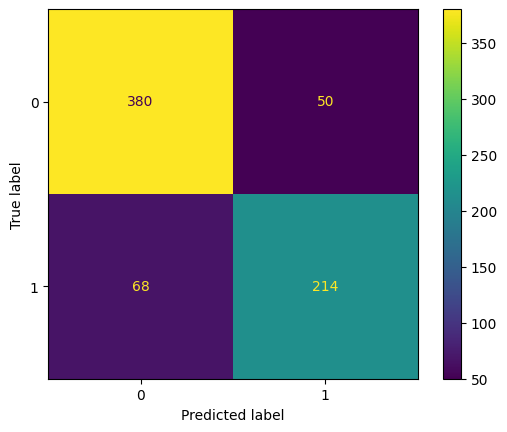

In [51]:
# Konfusionsmatrix und recall sowie precision
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



y_train_pred = cross_val_predict(model, X_train, y_train, cv=10)

# Auskommentieren, wenn ohne Threshold predicted werden soll
y_train_pred = y_alt_threshold_pred.astype(int)

cm = confusion_matrix(y_train, y_train_pred)


cm_display = ConfusionMatrixDisplay(cm).plot()

In [50]:
# Show accuracy
from sklearn.metrics import accuracy_score

y_test_scores = model.decision_function(X_test)

threshold = 0.7

y_alt_threshold_test_pred = (y_test_scores > threshold)

acc = accuracy_score(y_test, y_alt_threshold_test_pred.astype(int))

print(f"Accuarcy: {acc}")

Accuarcy: 0.8603351955307262


In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(f"Precision: \t{precision_score(y_train, y_train_pred)}")
print(f"Recall: \t{recall_score(y_train, y_train_pred)}")
print(f"F1 Score: \t{f1_score(y_train, y_train_pred)}")

Precision: 	0.888235294117647
Recall: 	0.5354609929078015
F1 Score: 	0.668141592920354


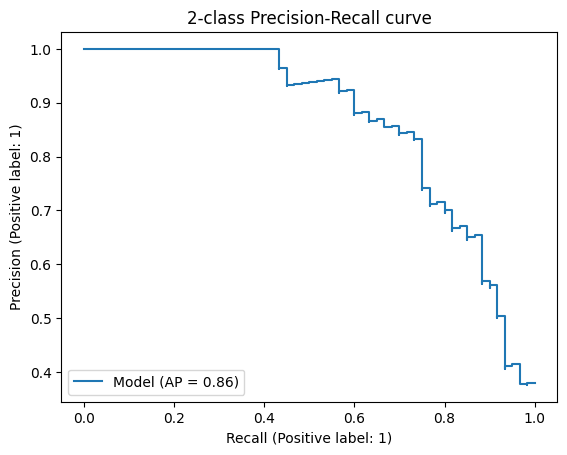

In [35]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    model, X_test, y_test, name="Model"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [41]:
# Schwellenwert anpassen
y_scores = model.decision_function(X_train)

# Thresohold ist weiter oben definiert

y_alt_threshold_pred = (y_scores > threshold)

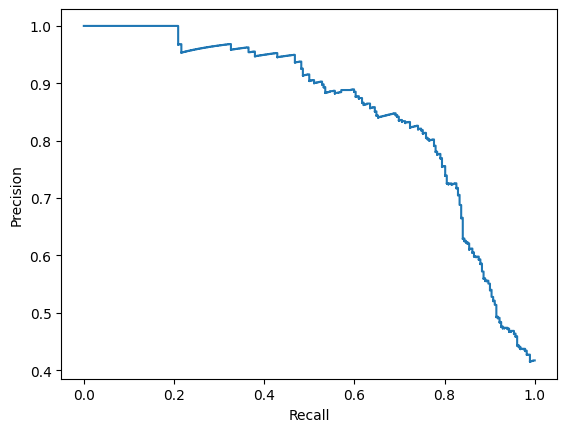

In [15]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
pr_display = PrecisionRecallDisplay(precision=precisions, recall=recalls).plot()

In [16]:
# Test Datensatz
test_kaggle = pd.read_csv("../data/test.csv")
_test_kaggle = test_kaggle.copy()

test_kaggle = transform_data(test_kaggle)

In [17]:
from datetime import datetime

preds_kaggle = model.predict(test_kaggle)
output = pd.DataFrame({"PassengerId": _test_kaggle["PassengerId"], "Survived": preds_kaggle})
output_path = f"../submissions/submsission {datetime.today().strftime('%Y-%m-%d %H_%M_%S')}.csv"
# output.to_csv(output_path, index=False)